In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

In [3]:
# Load the coin images in grayscale
coins_img = cv.imread('coins.png', cv.IMREAD_GRAYSCALE)
assert coins_img is not None

dime_img = cv.imread('Dime.png', cv.IMREAD_GRAYSCALE)
assert dime_img is not None

nickel_img = cv.imread('Nickel.png', cv.IMREAD_GRAYSCALE)
assert nickel_img is not None

penny_img = cv.imread('Penny.png', cv.IMREAD_GRAYSCALE)
assert penny_img is not None

quarter_img = cv.imread('Quarter.png', cv.IMREAD_GRAYSCALE)
assert quarter_img is not None

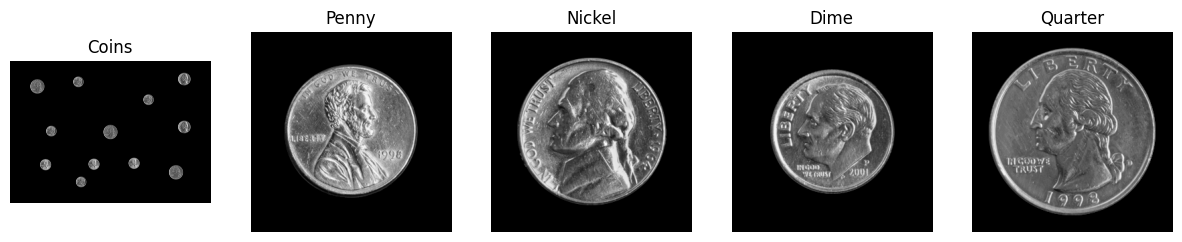

In [4]:
# Display the loaded images
plt.figure(figsize=(15, 5))
images = [coins_img, penny_img, nickel_img, dime_img, quarter_img]
titles = ['Coins', 'Penny', 'Nickel', 'Dime', 'Quarter']

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

In [5]:
# Perform template matching
penny_match = cv.matchTemplate(coins_img, penny_img, cv.TM_CCOEFF_NORMED)
nickel_match = cv.matchTemplate(coins_img, nickel_img, cv.TM_CCOEFF_NORMED)
dime_match = cv.matchTemplate(coins_img, dime_img, cv.TM_CCOEFF_NORMED)
quarter_match = cv.matchTemplate(coins_img, quarter_img, cv.TM_CCOEFF_NORMED)

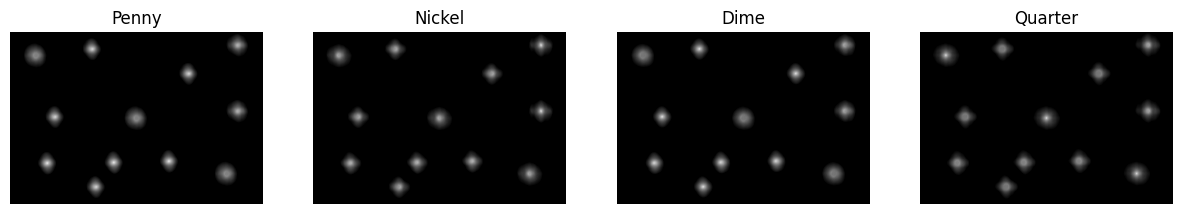

In [6]:
# Display the template matching results
plt.figure(figsize=(15, 5))
match_results = [penny_match, nickel_match, dime_match, quarter_match]

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(match_results[i], cmap='gray', vmin=0, vmax=1)
    plt.title(titles[i+1])
    plt.axis('off')
plt.show()


In [7]:
# Define pastel colors for drawing
pastel_colors = [
    (255, 182, 193),  # pink
    (173, 216, 230),  # blue
    (119, 221, 119),  # green
    (253, 253, 150)   # yellow
]

In [8]:
# Convert the grayscale coins image to BGR for color drawing
coins_colored = cv.cvtColor(coins_img, cv.COLOR_GRAY2BGR)

In [9]:
# Templates, names, and responses
templates = [penny_img, nickel_img, dime_img, quarter_img]
coin_names = ['Penny', 'Nickel', 'Dime', 'Quarter']
responses = [penny_match, nickel_match, dime_match, quarter_match]

In [10]:
# Dictionary to keep count of each coin type
coin_counts = {name: 0 for name in coin_names}

In [11]:
# Process each template and draw rectangles around matches
for idx, (template, response, name) in enumerate(zip(templates, responses, coin_names)):
    template_height, template_width = template.shape
    detected_coords = peak_local_max(response, min_distance=20, threshold_abs=0.9)
    coin_counts[name] = len(detected_coords)
    for coord in detected_coords:
        top_left = (coord[1], coord[0])
        bottom_right = (coord[1] + template_width, coord[0] + template_height)
        cv.rectangle(coins_colored, top_left, bottom_right, pastel_colors[idx], 2)
        cv.putText(coins_colored, name, (coord[1], coord[0] - 10), cv.FONT_HERSHEY_SIMPLEX, 0.6, pastel_colors[idx], 2, cv.LINE_AA)

In [12]:
# Draw legend
for idx, (name, color) in enumerate(zip(coin_names, pastel_colors)):
    cv.rectangle(coins_colored, (30, 115 + 20 * idx), (50, 135 + 20 * idx), color, -1)
    cv.putText(coins_colored, name, (60, 130 + 20 * idx), cv.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv.LINE_AA)

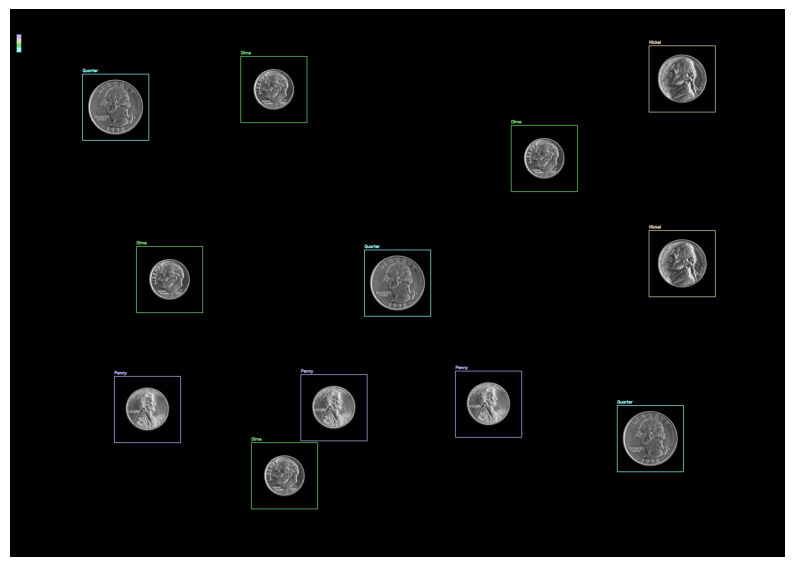

In [13]:
# Display the final annotated image
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(coins_colored, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [14]:
# Output the count of each coin type
for coin_name, count in coin_counts.items():
    print(f"{coin_name}: {count}")


Penny: 3
Nickel: 2
Dime: 4
Quarter: 3
